# Heart disease project

This notebook is an end-to-end project for "Machine Learning & Data Science Boot Complete Bootcamp" by Zero to Mastery Academy: https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/

The following document is a workflow to solve the heart disease classfication problem.

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict  whether or not they have heart disease?

## 2. Data

Our dataset is taken from here: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci


## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease durin the proof concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Data dictionary**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0 = no disease, 1 = disease

## Collecting the tools that we'll use

We're goingo to use Panda, NumPy, Matplotlib and Scikit-Learn. 

In [3]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Sckit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Loading the data

In [4]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

Explore the data, comparing column to each other and to the target.

The goal here is to find out more about the data and become a subject matter export on the dataset we're working with. 

1. What question(s) are we try to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?


In [5]:
# Checking the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Counting the element in each class
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

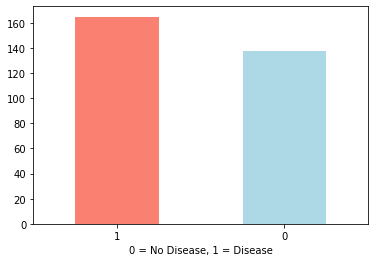

In [9]:
# Visualizing the classes with a bat plot.
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

plt.xlabel("0 = No Disease, 1 = Disease");
plt.xticks(rotation = 0);

In [10]:
# Checking for any missing data or non-numerical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Since there aren't missing data or non-numericala data we can proceed to confront columns and find some interest information on the dataset.

### Heart Disease Frequency according to Sex

Here we compare `Sex` with the target to find some patterns.

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

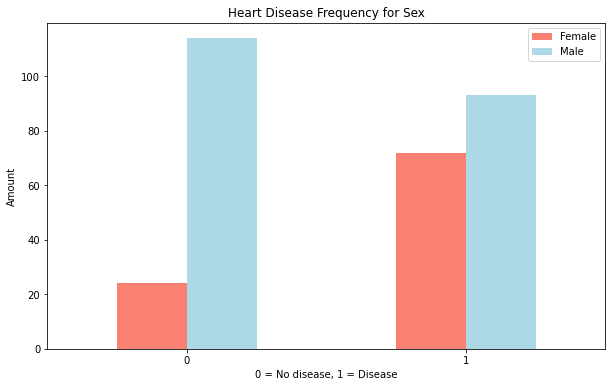

In [19]:
# Creating a plot for crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (10, 6),
                                    color = ["salmon", "lightblue"]);

plt.title("Heart Disease Frequency for Sex");
plt.ylabel("Amount");
plt.xlabel("0 = No disease, 1 = Disease");
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

#### Age vs. Max Heart Rate for Heart Disease

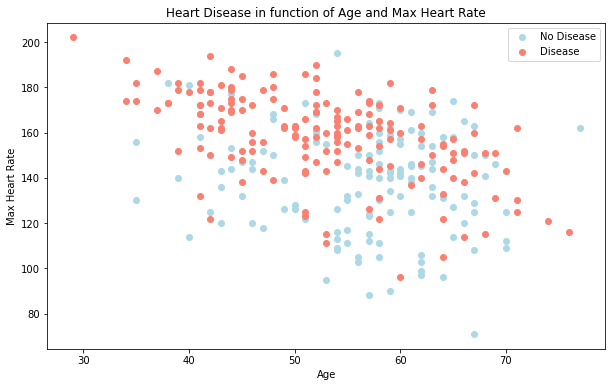

In [35]:
# Creating figure
plt.figure(figsize = (10,6))

# Plotting scatter for age and max heart rate with no disease
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "lightblue")

# Plotting scatter for age and max heart rate with disease
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon")

# Adding descriptive elements to the plot
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(["No Disease", "Disease"]);

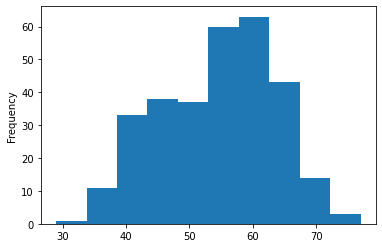

In [27]:
# Checking the distribution of age. 
df.age.plot.hist();

### Heart Disease vs. Chest Pain

3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic

In [29]:
pd.crosstab(df.target, df.cp).T

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


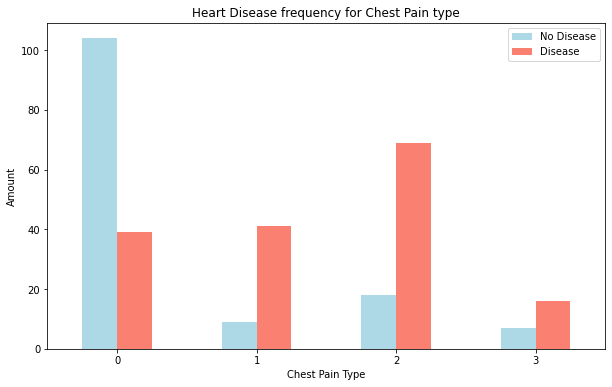

In [36]:
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize = (10, 6),
                                   color = ["lightblue", "salmon"]);

plt.title("Heart Disease frequency for Chest Pain type");
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount");
plt.xticks(rotation = 0);
plt.legend(["No Disease", "Disease"]);


#### Create a correlation matrix

According to definition:

> A correlation matrix is simply a table which displays the correlation coefficients for different variables.
> https://corporatefinanceinstitute.com/resources/excel/study/correlation-matrix/

> Correlation is any statistical relationship, whether causal or not, between two random variables or bivariate data.
> It refers to the degree to which a pair of variables are related.

Correlation coefficient goes from a minimum of -1 to a mximum of 1:
* A 0 coefficent means that there's no correlation: the two variables are not mutually influenced.
* A positive coefficient means that there's a positive correlation between variables: if one increase the other increase too.
* A negative coefficient means that there's a negative correlation between variables: if one increase, the other decrease and viceversa.

In [37]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


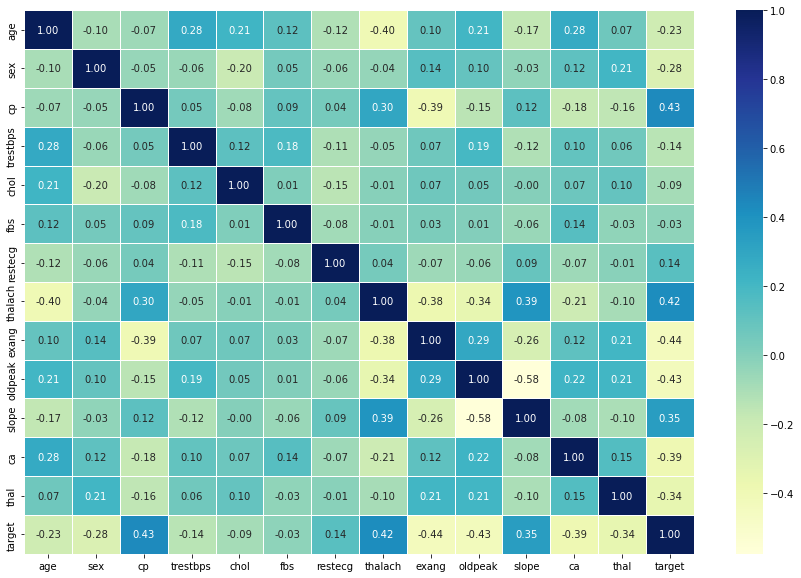

In [42]:
# Visualizing corraltion matrix with sns heatmap

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu");

## 5: Modeling

We have done some EDA on data. We have found some correlations but let's see if we can refine this.

We can do a Data Driven EDA, modeling a machine to find patterns between the data.

This is a **classification** problem with only two classes (0 = No disease, 1 = Disease).

We are going to try some different models from `Scikit-Learn` library, follwing this model map:
* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

First of all we preprocess the data.

In [45]:
# Creating X and y
X = df.drop("target", axis = 1)
y = df["target"]

# Splitting the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

To avoid sprea of errors we standardize features.

In [54]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

X_train_std = sclr.fit_transform(X_train)
X_test_std = sclr.transform(X_test)

We want to define a function to train a bunch of models to see wich of them provides the best accuray, and then tuning those models to improve accuracy.

In [55]:
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest Classifier": RandomForestClassifier(),
          "KNN": KNeighborsClassifier()}

# Define a function to fit and score our models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels) 
    y_train : training labels
    y_test : test labels
    """
    # Setup random seed
    np.random.seed(42)
    
    # Setup an empty dictionary to record scores 
    model_scores = {}
    
    # Iterating over models
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Scoring the model and update model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [56]:
model_scores = fit_and_score(models,
                             X_train = X_train_std,
                             X_test = X_test_std,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Logistic Regression': 0.8032786885245902,
 'Random Forest Classifier': 0.7540983606557377,
 'KNN': 0.7377049180327869}

**Model Comparison**

Plotting models accuracy

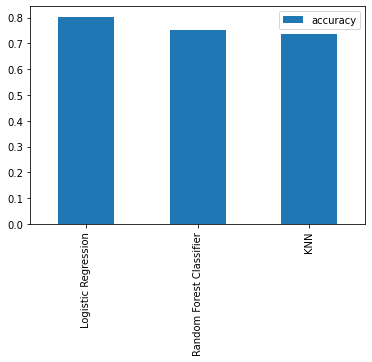

In [57]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

As we can see `LogisticRegression` has the most higher accuracy.

Now we try to improve our models to see if we can aquire the desired accuracy.

### Hyperparameter tuning

**KNN Tuning**

To tune `KNN` we try to adjust `n_neighbours`.

In [73]:
train_scores = []
test_scores = []

n_neighbors = range(1, 21)

# Setup KNN
knn = KNeighborsClassifier()

for i in n_neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the model
    knn.fit(X_train_std, y_train)
    
    # Score the model
    train_scores.append(knn.score(X_train_std, y_train))
    test_scores.append(knn.score(X_test_std,y_test))

Let's visualize score in function of `n_neighbors`

The best accuracy score with KNN, after tuning, is: 83.61%
with the optimal number of neighbors: 16


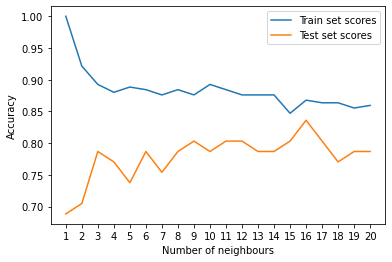

In [80]:
plt.plot(n_neighbors, train_scores, label = " Train scores")
plt.plot(n_neighbors, test_scores, label = "Test scores")
plt.xticks(range(1, 21, 1))
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.legend(["Train set scores", "Test set scores"]);

print(f"The best accuracy score with KNN, after tuning, is: {max(test_scores)*100:.2f}%")
print(f"with the optimal number of neighbors: {test_scores.index(max(test_scores))+1}")

The best score for `KNN`, after tuning, is a bit higer than the other models.

Let's try to tune the other to model to reach the higher score possible.

**Tuning RandomForestClassifier and LogisticRegression**

Let's tune `RandomForestClasifier` with `RandomSearchCV`

In [116]:
# Creating a PipeLine to avoid data leakage from Standardization
from sklearn.pipeline import Pipeline
pipe = Pipeline([("sclr", StandardScaler()), # StandardScaler 
                 ("rf", RandomForestClassifier(random_state = 42)) #RandomForestClassifier
                ])

# Creating a dict of hyperparameters to tune
n_estimators = range(10, 1000, 10)
max_depth = range(10, 100, 10)
params ={"rf__n_estimators": n_estimators,
         "rf__max_depth": max_depth ,
         "rf__min_samples_split": [2, 5, 10],
         "rf__min_samples_leaf": [1, 2, 4],
         "rf__bootstrap": [True, False]}

#Set up RandomizesSearchCV
rs_rf = RandomizedSearchCV(estimator = pipe,
                           param_distributions = params, 
                           scoring = "accuracy",
                           n_iter = 10,
                           n_jobs = -1,
                           cv = 5,
                           verbose = True)

# Fit the model with RSCV
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('sclr', StandardScaler()),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__max_depth': range(10, 100, 10),
                                        'rf__min_samples_leaf': [1, 2, 4],
                                        'rf__min_samples_split': [2, 5, 10],
                                        'rf__n_estimators': range(10, 1000, 10)},
                   scoring='accuracy', verbose=True)

In [117]:
rs_rf.score(X_test, y_test), rs_rf.best_params_

(0.7540983606557377,
 {'rf__n_estimators': 920,
  'rf__min_samples_split': 2,
  'rf__min_samples_leaf': 2,
  'rf__max_depth': 20,
  'rf__bootstrap': True})

ther's no improvement for RandomForestClassifier, but not enough to continue with this model.

Now let's tune `LogisticRegression` with RandomSearchCV

In [127]:
# Creating a PipeLine to avoid data leakage from Standardization
from sklearn.pipeline import Pipeline
pipe = Pipeline([("sclr", StandardScaler()), # StandardScaler 
                 ("lr", LogisticRegression()) #RandomForestClassifier
                ])

# Creating a dict of hyperparameters to tune

params ={"lr__C": [100, 10, 1, 0.1, 0.01],
         "lr__solver": ["liblinear"],
         "lr__penalty": ["l2"]
        }

#Set up RandomizesSearchCV
rs_lr = RandomizedSearchCV(estimator = pipe,
                           param_distributions = params, 
                           scoring = "accuracy",
                           n_iter = 5,
                           n_jobs = -1,
                           cv = 5,
                           verbose = True)

# Fit the model with RSCV
rs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('sclr', StandardScaler()),
                                             ('lr', LogisticRegression())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'lr__C': [100, 10, 1, 0.1, 0.01],
                                        'lr__penalty': ['l2'],
                                        'lr__solver': ['liblinear']},
                   scoring='accuracy', verbose=True)

In [128]:
rs_lr.score(X_test, y_test)

0.819672131147541

`LogisticRegression` also has a little improvement after tuning but not sufficent to reach the desiered sccuray score of 95%.

We might try other methods.

### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

using cross-validation if possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

Let's pick our KNN tuned model. 

In [137]:
# Setup our KNN model with best params and make some predictions
knn_tuned = KNeighborsClassifier(n_neighbors = 16)

knn_tuned.fit(X_train_std, y_train)
y_preds = knn_tuned.predict(X_test_std);

D:\ML-projects\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


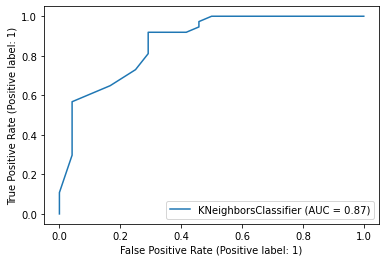

In [138]:
# Plotting ROC curve and calculate AUC
plot_roc_curve(knn_tuned, X_test_std, y_test)

In [139]:
# Print Confusion Matrix
confusion_matrix(y_preds, y_test)

array([[17,  3],
       [ 7, 34]], dtype=int64)

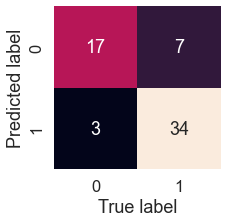

In [142]:
# Visualize confusion matrix with sns Heatmap
sns.set(font_scale = 1.5)

# Define a function to plot our confusion matrix 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [144]:
# Print classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.83      0.92      0.87        37

    accuracy                           0.84        61
   macro avg       0.84      0.81      0.82        61
weighted avg       0.84      0.84      0.83        61



We don't reach the desiered accuray, but we can see from other metrcis that our model perform quite well to predict the outomes. 

The only problem is that the we have a slightly too high value for False Negative, that could be a problem regarding the aim of the project to predict if a patient has or not heart disease.

We could try improve tuning our model or mybe choose another model that performs better other this dataste